In [426]:
#imported libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [427]:
df=pd.read_csv("Coca-Cola_stock_history.csv")
df1=pd.read_csv("Coca-Cola_stock_info.csv")

In [428]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02,0.050016,0.051378,0.050016,0.050016,806400,0.0,0
1,1962-01-03,0.049273,0.049273,0.048159,0.048902,1574400,0.0,0
2,1962-01-04,0.049026,0.049645,0.049026,0.049273,844800,0.0,0
3,1962-01-05,0.049273,0.049892,0.048035,0.048159,1420800,0.0,0
4,1962-01-08,0.047787,0.047787,0.046735,0.047664,2035200,0.0,0


In [429]:
df1.head()

,Key,Value
0,zip,30313
1,sector,Consumer Defensive
2,fullTimeEmployees,80300
3,longBusinessSummary,"The Coca-Cola Company, a beverage company, man..."
4,city,Atlanta


In [430]:
df.shape

(15311, 8)

In [431]:
df1.shape

(153, 2)

In [432]:
#imported coco cola stock price data from yahoo finance api
import yfinance as yf
ticker='KO'
data=yf.download(ticker,start='2015-01-01',end='2024-12-31')
data=data.reset_index()
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,KO,KO,KO,KO,KO
0,2015-01-02,30.662121,30.851305,30.414728,30.749435,9921100
1,2015-01-05,30.662121,31.266051,30.618465,31.062314,26292600
2,2015-01-06,30.894945,31.244205,30.734870,30.858564,16897500
3,2015-01-07,31.280603,31.367918,30.982277,31.142353,13412300
4,2015-01-08,31.658951,31.702609,31.360625,31.418836,21743600


In [433]:
data.columns=data.columns.droplevel(1)
data.head()

Price,Date,Close,High,Low,Open,Volume
0,2015-01-02,30.662121,30.851305,30.414728,30.749435,9921100
1,2015-01-05,30.662121,31.266051,30.618465,31.062314,26292600
2,2015-01-06,30.894945,31.244205,30.734870,30.858564,16897500
3,2015-01-07,31.280603,31.367918,30.982277,31.142353,13412300
4,2015-01-08,31.658951,31.702609,31.360625,31.418836,21743600


In [434]:
#cleaned the dataframe and made structured
data.columns.name=None
data.head()

,Date,Close,High,Low,Open,Volume
0,2015-01-02,30.662121,30.851305,30.414728,30.749435,9921100
1,2015-01-05,30.662121,31.266051,30.618465,31.062314,26292600
2,2015-01-06,30.894945,31.244205,30.734870,30.858564,16897500
3,2015-01-07,31.280603,31.367918,30.982277,31.142353,13412300
4,2015-01-08,31.658951,31.702609,31.360625,31.418836,21743600


In [435]:
#created a new column for month and year
data['Year']=data['Date'].dt.year
data['Month']=data['Date'].dt.month
data.head()

,Date,Close,High,Low,Open,Volume,Year,Month
0,2015-01-02,30.662121,30.851305,30.414728,30.749435,9921100,2015,1
1,2015-01-05,30.662121,31.266051,30.618465,31.062314,26292600,2015,1
2,2015-01-06,30.894945,31.244205,30.734870,30.858564,16897500,2015,1
3,2015-01-07,31.280603,31.367918,30.982277,31.142353,13412300,2015,1
4,2015-01-08,31.658951,31.702609,31.360625,31.418836,21743600,2015,1


In [436]:
months={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
for month in data['Month']:
    data['Month']=data['Month'].replace(months)
data.head()

,Date,Close,High,Low,Open,Volume,Year,Month
0,2015-01-02,30.662121,30.851305,30.414728,30.749435,9921100,2015,January
1,2015-01-05,30.662121,31.266051,30.618465,31.062314,26292600,2015,January
2,2015-01-06,30.894945,31.244205,30.734870,30.858564,16897500,2015,January
3,2015-01-07,31.280603,31.367918,30.982277,31.142353,13412300,2015,January
4,2015-01-08,31.658951,31.702609,31.360625,31.418836,21743600,2015,January


In [437]:
data['Volatility']=data['High']-data['Low']
data.head()

,Date,Close,High,Low,Open,Volume,Year,Month,Volatility
0,2015-01-02,30.662121,30.851305,30.414728,30.749435,9921100,2015,January,0.436577
1,2015-01-05,30.662121,31.266051,30.618465,31.062314,26292600,2015,January,0.647586
2,2015-01-06,30.894945,31.244205,30.734870,30.858564,16897500,2015,January,0.509335
3,2015-01-07,31.280603,31.367918,30.982277,31.142353,13412300,2015,January,0.385640
4,2015-01-08,31.658951,31.702609,31.360625,31.418836,21743600,2015,January,0.341985


In [438]:
data.isnull().sum()

Date          0
Close         0
High          0
Low           0
Open          0
Volume        0
Year          0
Month         0
Volatility    0
dtype: int64

In [439]:
data.isna().sum()

Date          0
Close         0
High          0
Low           0
Open          0
Volume        0
Year          0
Month         0
Volatility    0
dtype: int64

In [440]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2515 non-null   datetime64[ns]
 1   Close       2515 non-null   float64       
 2   High        2515 non-null   float64       
 3   Low         2515 non-null   float64       
 4   Open        2515 non-null   float64       
 5   Volume      2515 non-null   int64         
 6   Year        2515 non-null   int32         
 7   Month       2515 non-null   object        
 8   Volatility  2515 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int32(1), int64(1), object(1)
memory usage: 167.1+ KB


In [441]:
#exported the cleaned dataset for reproducability
data.to_csv('Coco_Cola Cleaned Stock Data',index=False)

#### Exploratory Data Analysis

In [442]:
data.describe()

,Date,Close,High,Low,Open,Volume,Year,Volatility
count,2515,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03,2515.000000,2515.000000
mean,2019-12-31 01:37:54.512922624,44.739664,45.041105,44.428890,44.741771,1.411268e+07,2019.496223,0.612215
min,2015-01-02 00:00:00,28.101784,28.494473,27.043994,28.101787,2.996300e+06,2015.000000,0.124202
25%,2017-07-01 12:00:00,34.926907,35.186876,34.713955,34.955205,1.033380e+07,2017.000000,0.351164
50%,2019-12-31 00:00:00,43.140366,43.507114,42.856446,43.223670,1.282800e+07,2019.000000,0.513519
75%,2022-06-29 12:00:00,55.712166,56.200827,55.336927,55.744893,1.598985e+07,2022.000000,0.761957
max,2024-12-30 00:00:00,71.967041,72.479605,71.217896,72.252895,6.784570e+07,2024.000000,5.797003
std,NaN,11.037346,11.112641,10.949286,11.035926,6.139547e+06,2.871604,0.400288


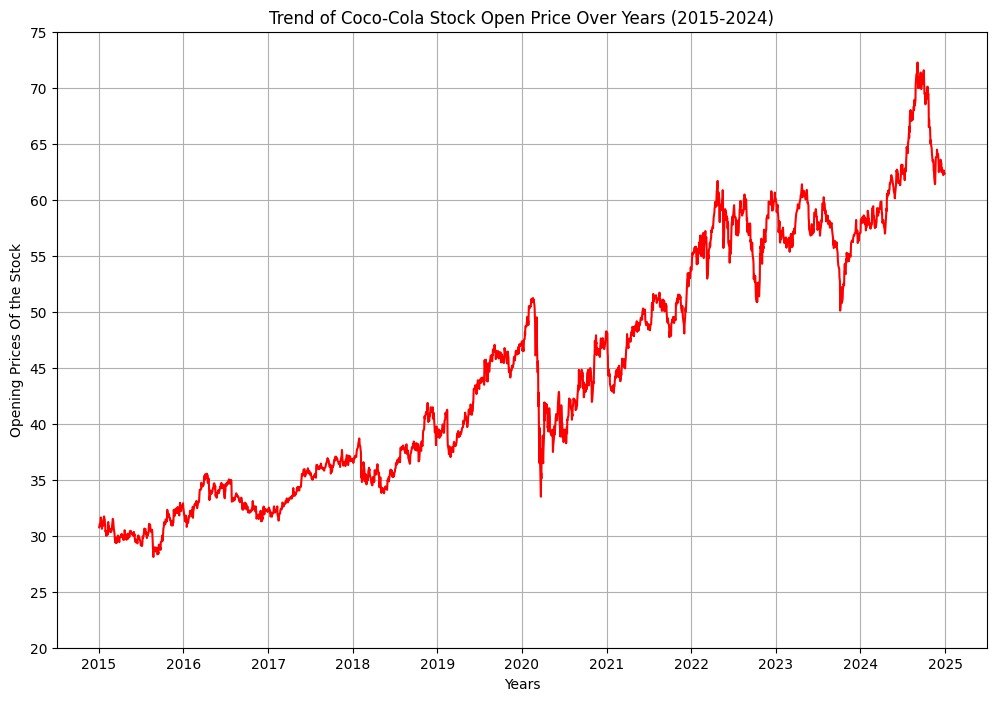

In [443]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Date',y='Open',color='red',data=data)
plt.xlabel('Years')
plt.ylabel('Opening Prices Of the Stock')
plt.yticks(range(20,80,5))
plt.grid(True)
plt.title('Trend of Coco-Cola Stock Open Price Over Years (2015-2024)')
plt.show()

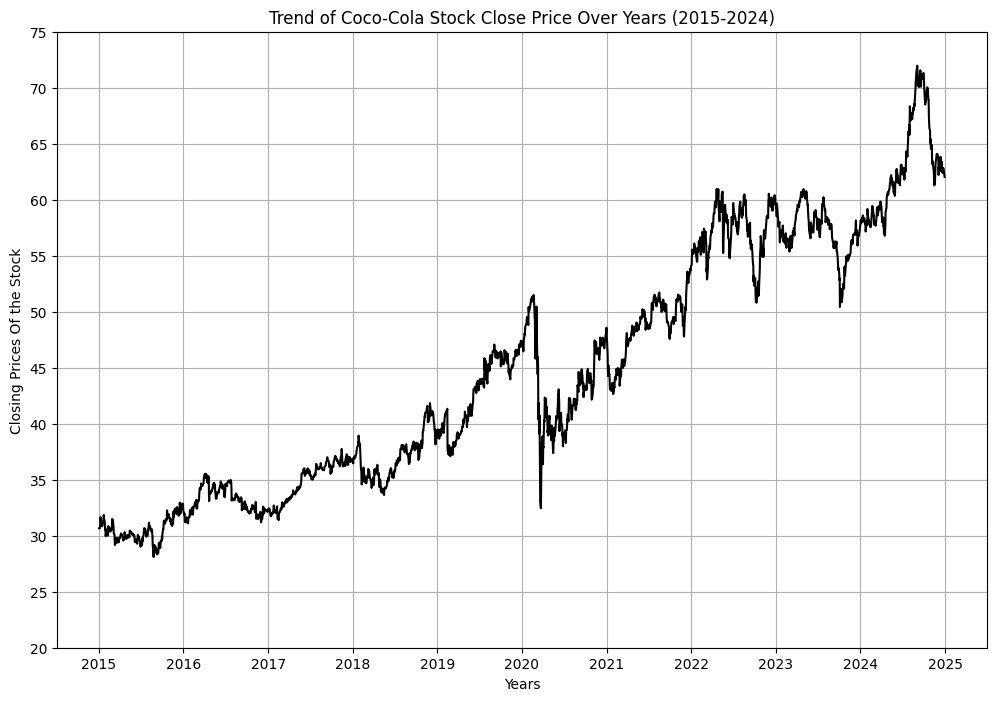

In [444]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Date',y='Close',color='black',data=data)
plt.xlabel('Years')
plt.ylabel('Closing Prices Of the Stock')
plt.yticks(range(20,80,5))
plt.grid(True)
plt.title('Trend of Coco-Cola Stock Close Price Over Years (2015-2024)')
plt.show()

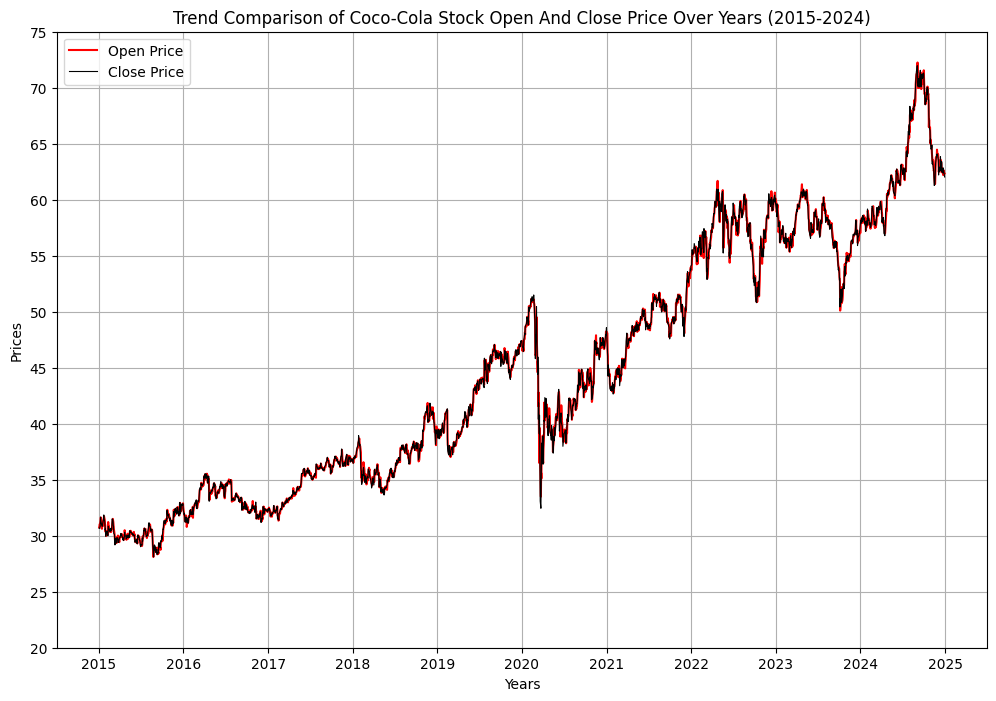

In [445]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Date',y='Open',color='red',data=data,label='Open Price')
sns.lineplot(x='Date',y='Close',color='black',data=data,linewidth=0.8,label='Close Price')
plt.xlabel('Years')
plt.ylabel('Prices')
plt.yticks(range(20,80,5))
plt.grid(True)
plt.title('Trend Comparison of Coco-Cola Stock Open And Close Price Over Years (2015-2024)')
plt.show()

In [446]:
data_year_wise=data.groupby(['Year'])[['Open','Close','Volatility']].mean().reset_index()
data_year_wise

,Year,Open,Close,Volatility
0,2015,30.451950,30.456468,0.378784
1,2016,33.178957,33.191243,0.372341
2,2017,34.931298,34.951765,0.299778
3,2018,37.006735,37.003887,0.509723
4,2019,42.815001,42.820208,0.519212
5,2020,43.473647,43.431397,0.954303
6,2021,48.603887,48.594901,0.612209
7,2022,57.082988,57.087924,0.985124
8,2023,57.103785,57.064702,0.698312
9,2024,62.924104,62.948878,0.792236


In [447]:
data_month_wise=data.groupby(['Month'])[['Open','Close','Volatility']].mean().reset_index()
data_month_wise

,Month,Open,Close,Volatility
0,April,43.847720,43.847624,0.622956
1,August,46.140407,46.130079,0.539794
2,December,46.609925,46.632177,0.605186
3,February,43.544926,43.534424,0.640524
4,January,43.581597,43.595522,0.594157
5,July,45.139894,45.178210,0.589480
6,June,44.193121,44.192528,0.575013
7,March,42.817458,42.844380,0.736789
8,May,44.235620,44.210984,0.588001
9,November,45.779710,45.760775,0.591684


In [448]:
month_order={'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
data_month_wise['Month2']=data_month_wise['Month'].map(month_order)
data_month_wise=data_month_wise.sort_values('Month2').drop(columns=['Month2'])
data_month_wise

,Month,Open,Close,Volatility
4,January,43.581597,43.595522,0.594157
3,February,43.544926,43.534424,0.640524
7,March,42.817458,42.844380,0.736789
0,April,43.847720,43.847624,0.622956
8,May,44.235620,44.210984,0.588001
6,June,44.193121,44.192528,0.575013
5,July,45.139894,45.178210,0.589480
1,August,46.140407,46.130079,0.539794
11,September,45.759201,45.701176,0.619037
10,October,45.150141,45.144310,0.643292


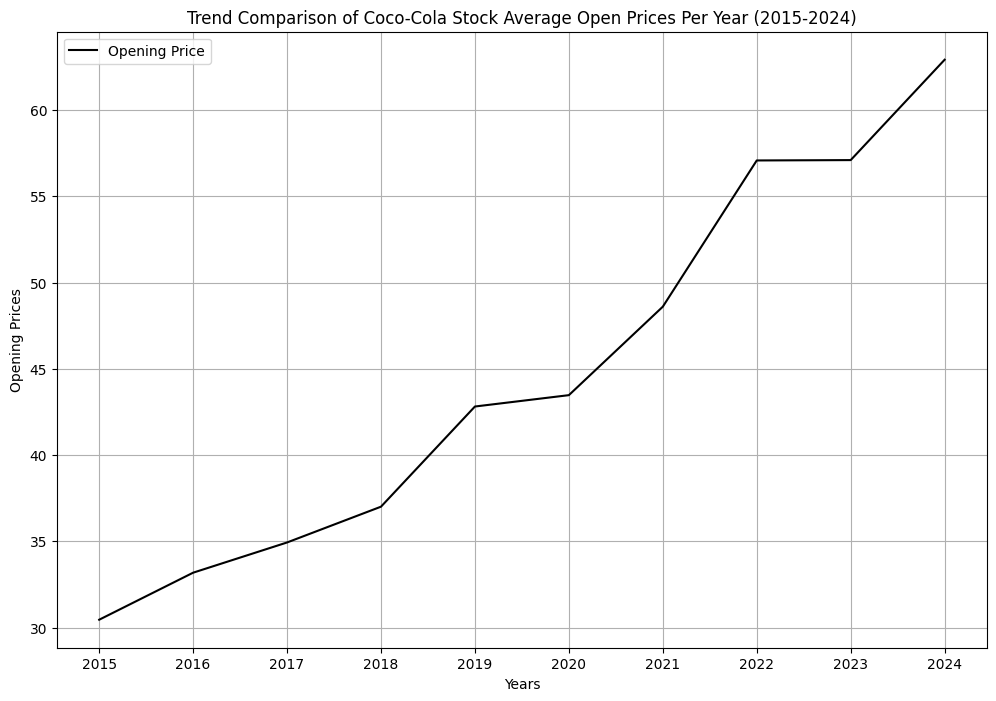

In [449]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Year',y='Open',color='black',data=data_year_wise,label='Opening Price')
plt.xlabel('Years')
plt.ylabel('Opening Prices')
plt.xticks(range(2015,2025,1))
plt.grid(True)
plt.title('Trend Comparison of Coco-Cola Stock Average Open Prices Per Year (2015-2024)')
plt.show()

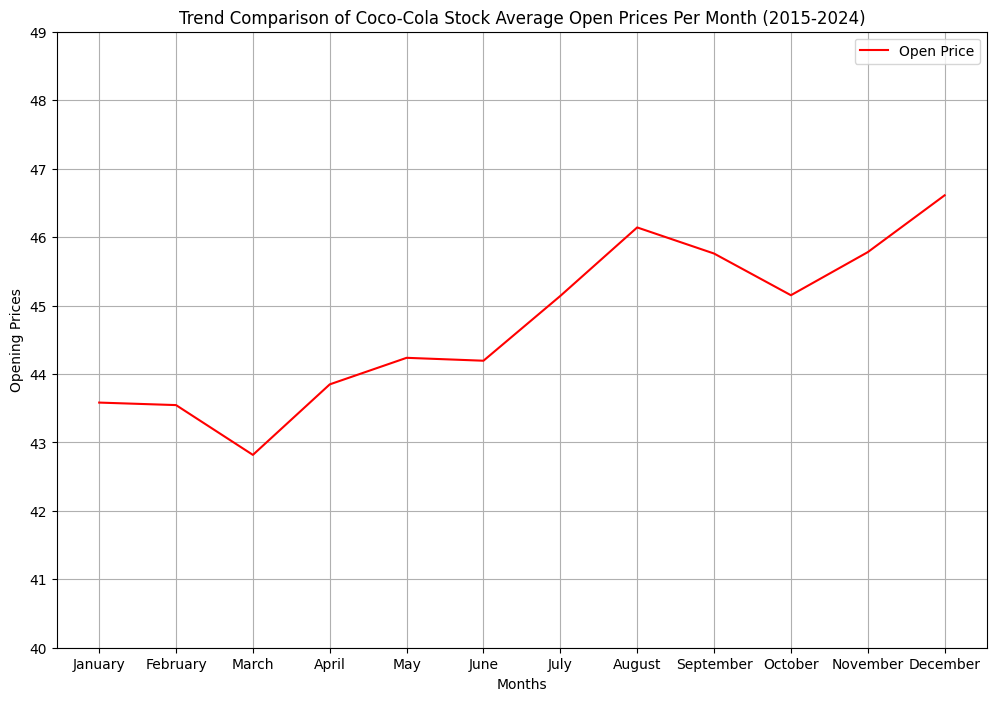

In [450]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Month',y='Open',color='red',data=data_month_wise,label='Open Price')
plt.xlabel('Months')
plt.ylabel('Opening Prices')
plt.yticks(range(40,50,1))
plt.grid(True)
plt.title('Trend Comparison of Coco-Cola Stock Average Open Prices Per Month (2015-2024)')
plt.show()

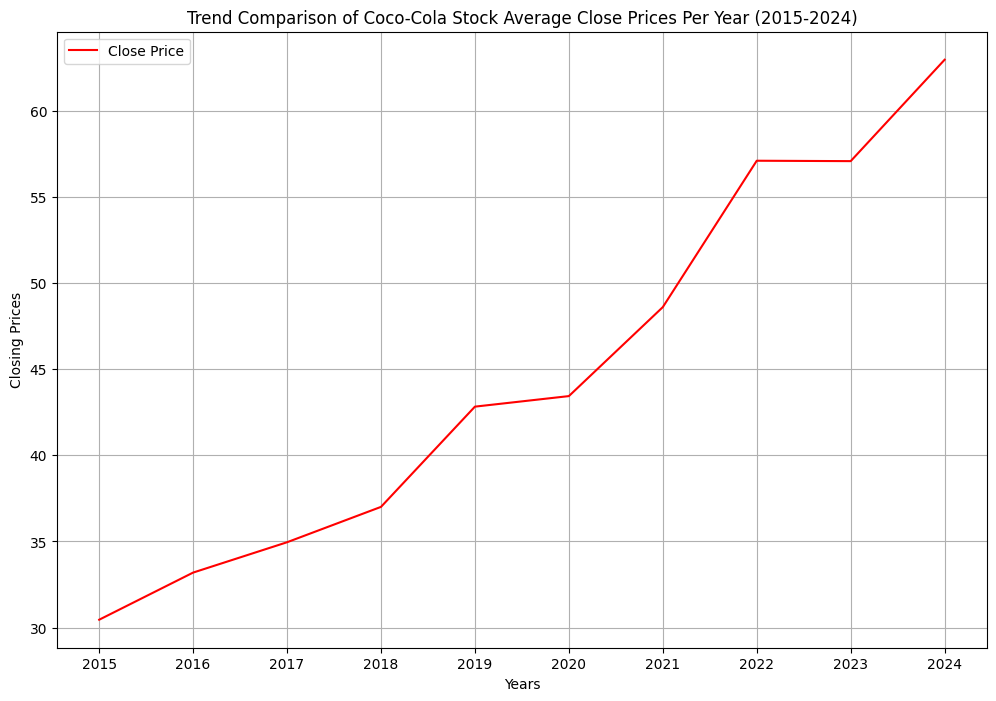

In [451]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Year',y='Close',color='red',data=data_year_wise,label='Close Price')
plt.xlabel('Years')
plt.ylabel('Closing Prices')
plt.xticks(range(2015,2025,1))
plt.grid(True)
plt.title('Trend Comparison of Coco-Cola Stock Average Close Prices Per Year (2015-2024)')
plt.show()

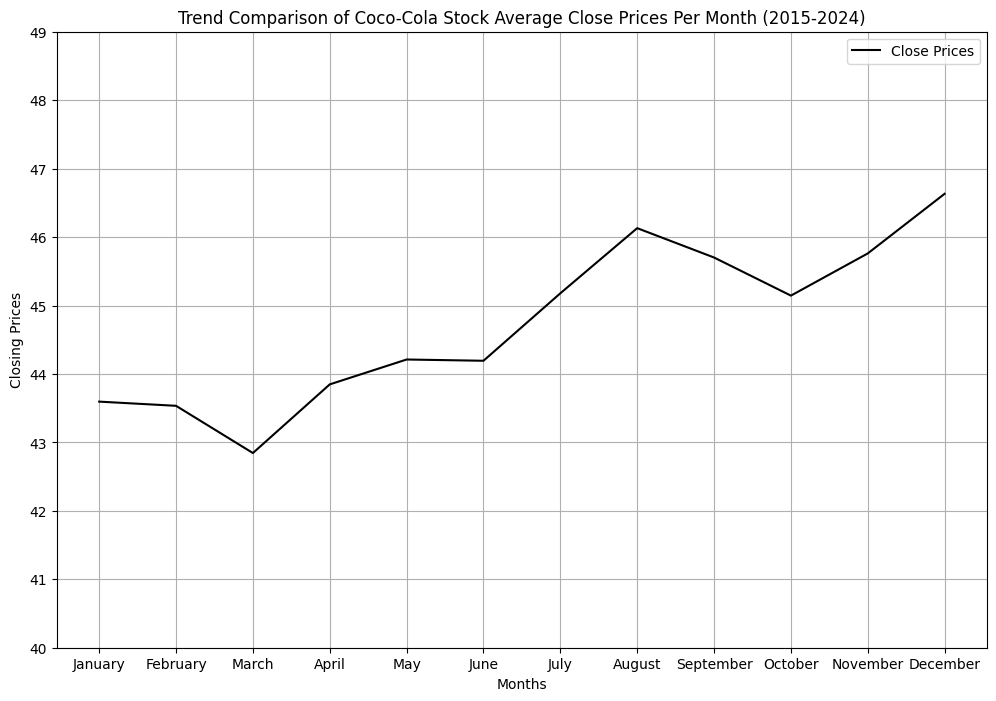

In [452]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Month',y='Close',color='black',data=data_month_wise,label='Close Prices')
plt.xlabel('Months')
plt.ylabel('Closing Prices')
plt.yticks(range(40,50,1))
plt.grid(True)
plt.title('Trend Comparison of Coco-Cola Stock Average Close Prices Per Month (2015-2024)')
plt.show()

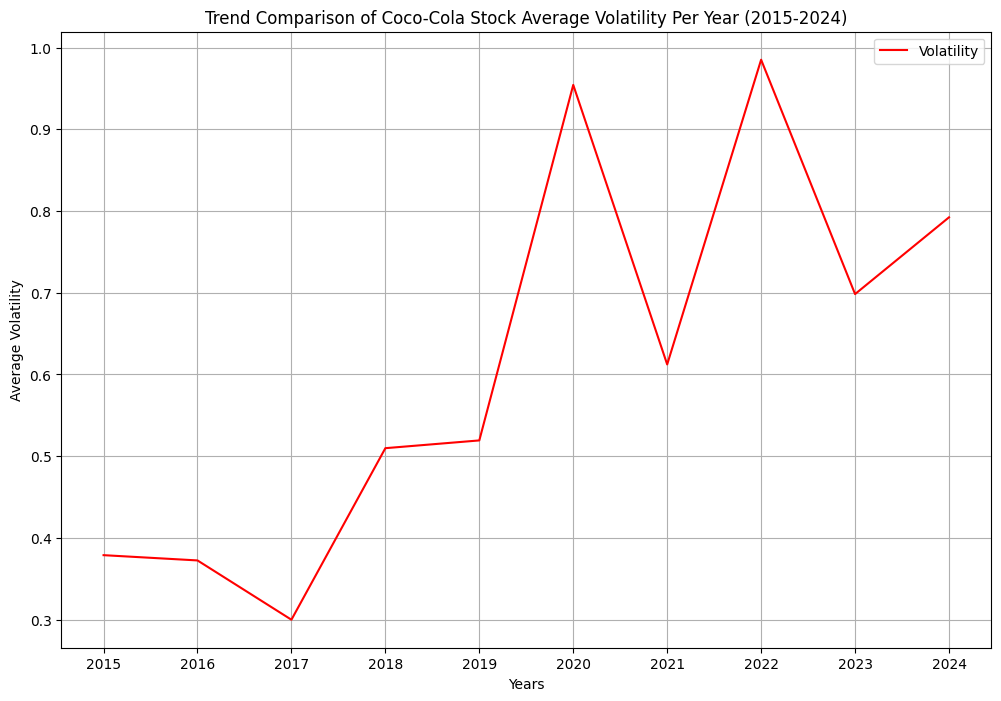

In [453]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Year',y='Volatility',color='red',data=data_year_wise,label='Volatility')
plt.xlabel('Years')
plt.ylabel('Average Volatility')
plt.xticks(range(2015,2025,1))
plt.grid(True)
plt.title('Trend Comparison of Coco-Cola Stock Average Volatility Per Year (2015-2024)')
plt.show()

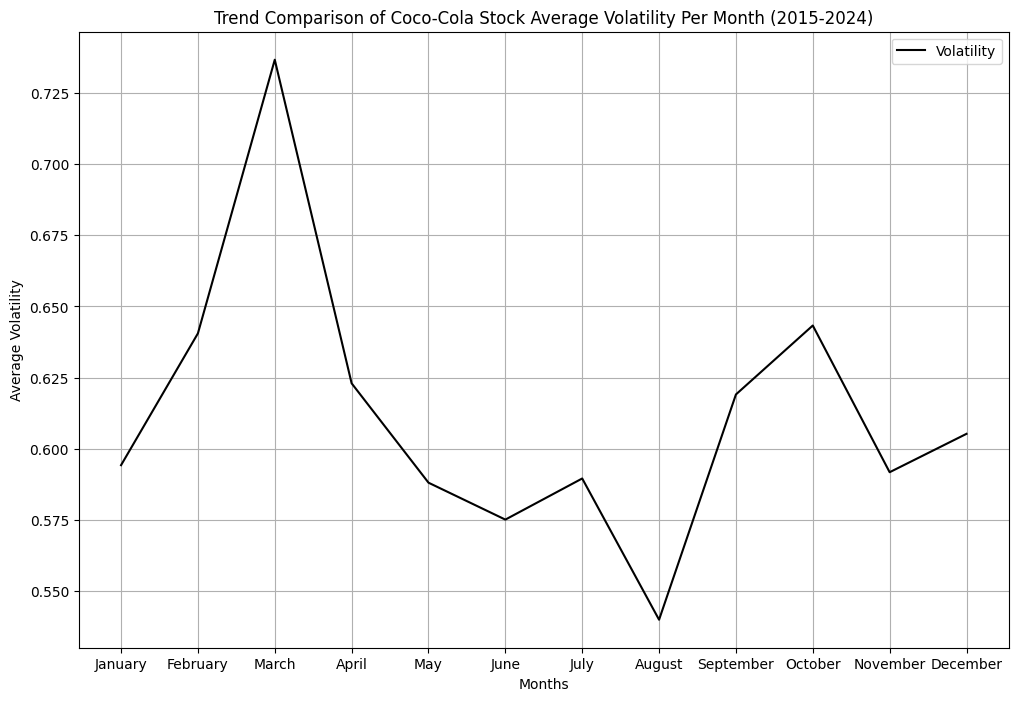

In [454]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Month',y='Volatility',color='black',data=data_month_wise,label='Volatility')
plt.xlabel('Months')
plt.ylabel('Average Volatility')
plt.grid(True)
plt.title('Trend Comparison of Coco-Cola Stock Average Volatility Per Month (2015-2024)')
plt.show()

In [455]:
#Applied logarithmic transformation to the column volume and created a new column for Visualization
import numpy as np
data['Volume_log']=np.log1p(data['Volume'])
data.head()

,Date,Close,High,Low,Open,Volume,Year,Month,Volatility,Volume_log
0,2015-01-02,30.662121,30.851305,30.414728,30.749435,9921100,2015,January,0.436577,16.110174
1,2015-01-05,30.662121,31.266051,30.618465,31.062314,26292600,2015,January,0.647586,17.084798
2,2015-01-06,30.894945,31.244205,30.734870,30.858564,16897500,2015,January,0.509335,16.642676
3,2015-01-07,31.280603,31.367918,30.982277,31.142353,13412300,2015,January,0.385640,16.411683
4,2015-01-08,31.658951,31.702609,31.360625,31.418836,21743600,2015,January,0.341985,16.894830


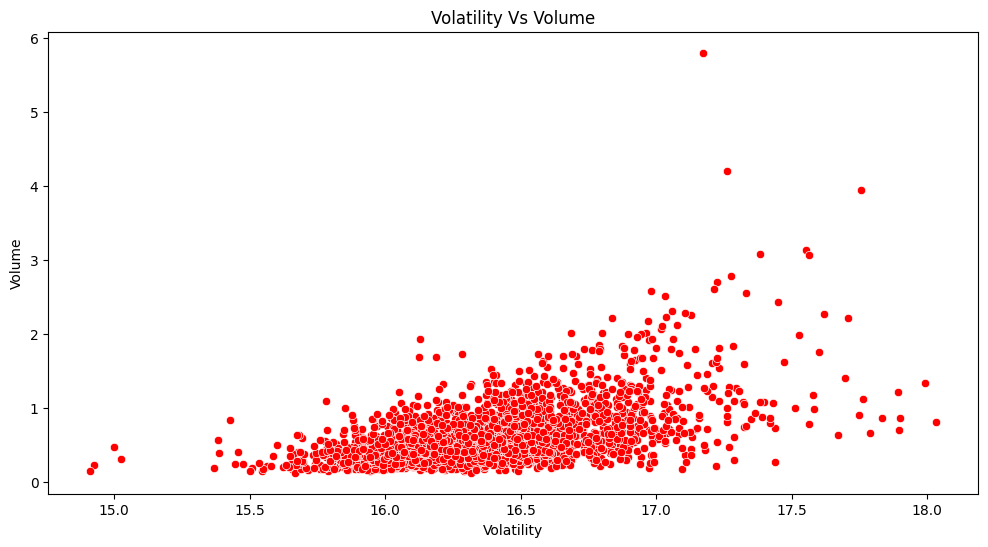

In [456]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=data,x=data['Volume_log'],y=data['Volatility'],color='red')
plt.xlabel('Volatility')
plt.title('Volatility Vs Volume')
plt.ylabel('Volume')
plt.show()

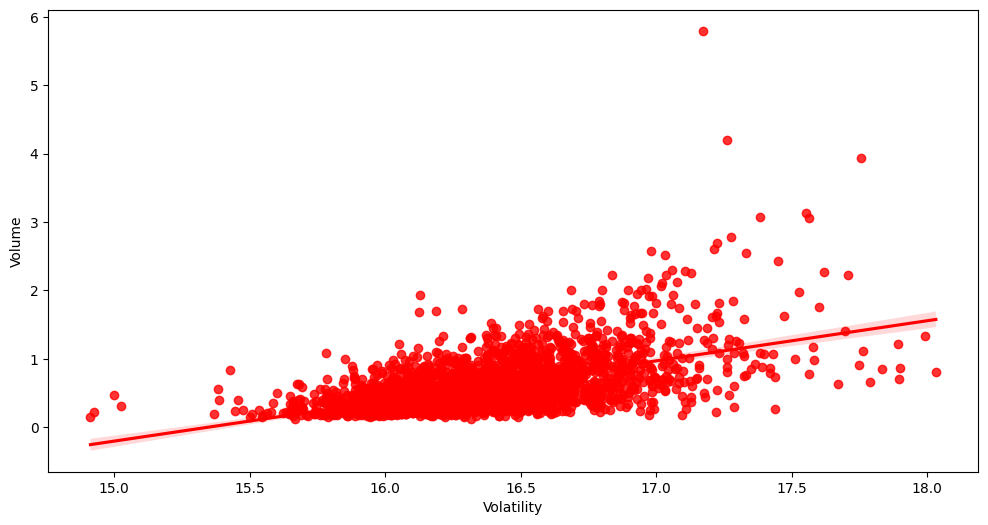

In [457]:
#regression plot of volatility vs volume
plt.figure(figsize=(12,6))
sns.regplot(data=data,x=data['Volume_log'],y=data['Volatility'],color='red')
plt.xlabel('Volatility')
plt.ylabel('Volume')
plt.show()

#### Feature Engineering


In [458]:
#Applied Standardization to Volume and created a new column for ML model
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data['Standardised_Volume']=scaler.fit_transform(data[['Volume']])
data.head()

,Date,Close,High,Low,Open,Volume,Year,Month,Volatility,Volume_log,Standardised_Volume
0,2015-01-02,30.662121,30.851305,30.414728,30.749435,9921100,2015,January,0.436577,16.110174,-0.682853
1,2015-01-05,30.662121,31.266051,30.618465,31.062314,26292600,2015,January,0.647586,17.084798,1.984242
2,2015-01-06,30.894945,31.244205,30.734870,30.858564,16897500,2015,January,0.509335,16.642676,0.453678
3,2015-01-07,31.280603,31.367918,30.982277,31.142353,13412300,2015,January,0.385640,16.411683,-0.114099
4,2015-01-08,31.658951,31.702609,31.360625,31.418836,21743600,2015,January,0.341985,16.894830,1.243160


In [459]:
#created a new columns for previous day close rates and volatility
data['Prev_close']=data['Close'].shift(1)
data['Prev_volatility']=data['Volatility'].shift(1)
data.head()

,Date,Close,High,Low,Open,Volume,Year,Month,Volatility,Volume_log,Standardised_Volume,Prev_close,Prev_volatility
0,2015-01-02,30.662121,30.851305,30.414728,30.749435,9921100,2015,January,0.436577,16.110174,-0.682853,NaN,NaN
1,2015-01-05,30.662121,31.266051,30.618465,31.062314,26292600,2015,January,0.647586,17.084798,1.984242,30.662121,0.436577
2,2015-01-06,30.894945,31.244205,30.734870,30.858564,16897500,2015,January,0.509335,16.642676,0.453678,30.662121,0.647586
3,2015-01-07,31.280603,31.367918,30.982277,31.142353,13412300,2015,January,0.385640,16.411683,-0.114099,30.894945,0.509335
4,2015-01-08,31.658951,31.702609,31.360625,31.418836,21743600,2015,January,0.341985,16.894830,1.243160,31.280603,0.385640


In [460]:
#removed nan values
data['Prev_close']=data['Prev_close'].replace(np.nan,0)
data['Prev_volatility']=data['Prev_volatility'].replace(np.nan,0)
data.head()

,Date,Close,High,Low,Open,Volume,Year,Month,Volatility,Volume_log,Standardised_Volume,Prev_close,Prev_volatility
0,2015-01-02,30.662121,30.851305,30.414728,30.749435,9921100,2015,January,0.436577,16.110174,-0.682853,0.000000,0.000000
1,2015-01-05,30.662121,31.266051,30.618465,31.062314,26292600,2015,January,0.647586,17.084798,1.984242,30.662121,0.436577
2,2015-01-06,30.894945,31.244205,30.734870,30.858564,16897500,2015,January,0.509335,16.642676,0.453678,30.662121,0.647586
3,2015-01-07,31.280603,31.367918,30.982277,31.142353,13412300,2015,January,0.385640,16.411683,-0.114099,30.894945,0.509335
4,2015-01-08,31.658951,31.702609,31.360625,31.418836,21743600,2015,January,0.341985,16.894830,1.243160,31.280603,0.385640


In [461]:
#new column for daily returns in percentage
data['Daily_return_percent']=(data['Close']-data['Open'])/data['Open']*100
data.head()

,Date,Close,High,Low,Open,Volume,Year,Month,Volatility,Volume_log,Standardised_Volume,Prev_close,Prev_volatility,Daily_return_percent
0,2015-01-02,30.662121,30.851305,30.414728,30.749435,9921100,2015,January,0.436577,16.110174,-0.682853,0.000000,0.000000,-0.283954
1,2015-01-05,30.662121,31.266051,30.618465,31.062314,26292600,2015,January,0.647586,17.084798,1.984242,30.662121,0.436577,-1.288356
2,2015-01-06,30.894945,31.244205,30.734870,30.858564,16897500,2015,January,0.509335,16.642676,0.453678,30.662121,0.647586,0.117895
3,2015-01-07,31.280603,31.367918,30.982277,31.142353,13412300,2015,January,0.385640,16.411683,-0.114099,30.894945,0.509335,0.443931
4,2015-01-08,31.658951,31.702609,31.360625,31.418836,21743600,2015,January,0.341985,16.894830,1.243160,31.280603,0.385640,0.764238


In [462]:
#added columns of moving averages and replaced dnull values with backfill 
data['MA_7']=data['Close'].rolling(7).mean()
data['MA_50']=data['Close'].rolling(50).mean()
data['MA_7']=data['MA_7'].fillna(method='bfill')
data['MA_50']=data['MA_50'].fillna(method='bfill')
data.head(10)

C:\Users\user\AppData\Local\Temp\ipykernel_25888\3196388014.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['MA_7']=data['MA_7'].fillna(method='bfill')
C:\Users\user\AppData\Local\Temp\ipykernel_25888\3196388014.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['MA_50']=data['MA_50'].fillna(method='bfill')


,Date,Close,High,Low,Open,Volume,Year,Month,Volatility,Volume_log,Standardised_Volume,Prev_close,Prev_volatility,Daily_return_percent,MA_7,MA_50
0,2015-01-02,30.662121,30.851305,30.414728,30.749435,9921100,2015,January,0.436577,16.110174,-0.682853,0.000000,0.000000,-0.283954,31.070625,30.668404
1,2015-01-05,30.662121,31.266051,30.618465,31.062314,26292600,2015,January,0.647586,17.084798,1.984242,30.662121,0.436577,-1.288356,31.070625,30.668404
2,2015-01-06,30.894945,31.244205,30.734870,30.858564,16897500,2015,January,0.509335,16.642676,0.453678,30.662121,0.647586,0.117895,31.070625,30.668404
3,2015-01-07,31.280603,31.367918,30.982277,31.142353,13412300,2015,January,0.385640,16.411683,-0.114099,30.894945,0.509335,0.443931,31.070625,30.668404
4,2015-01-08,31.658951,31.702609,31.360625,31.418836,21743600,2015,January,0.341985,16.894830,1.243160,31.280603,0.385640,0.764238,31.070625,30.668404
5,2015-01-09,31.309704,31.695347,31.251495,31.629861,12733500,2015,January,0.443852,16.359747,-0.224683,31.658951,0.341985,-1.012198,31.070625,30.668404
6,2015-01-12,31.025930,31.433401,30.894958,31.338809,11415800,2015,January,0.538444,16.250509,-0.439351,31.309704,0.443852,-0.998375,31.070625,30.668404
7,2015-01-13,31.018661,31.462513,30.887689,31.164187,12529500,2015,January,0.574825,16.343597,-0.257917,31.025930,0.538444,-0.466964,31.121559,30.668404
8,2015-01-14,30.967718,30.996821,30.611181,30.618458,13447600,2015,January,0.385640,16.414311,-0.108348,31.018661,0.574825,1.140683,31.165216,30.668404
9,2015-01-15,30.836737,31.185996,30.683933,31.164168,11193100,2015,January,0.502063,16.230808,-0.475631,30.967718,0.385640,-1.050667,31.156901,30.668404


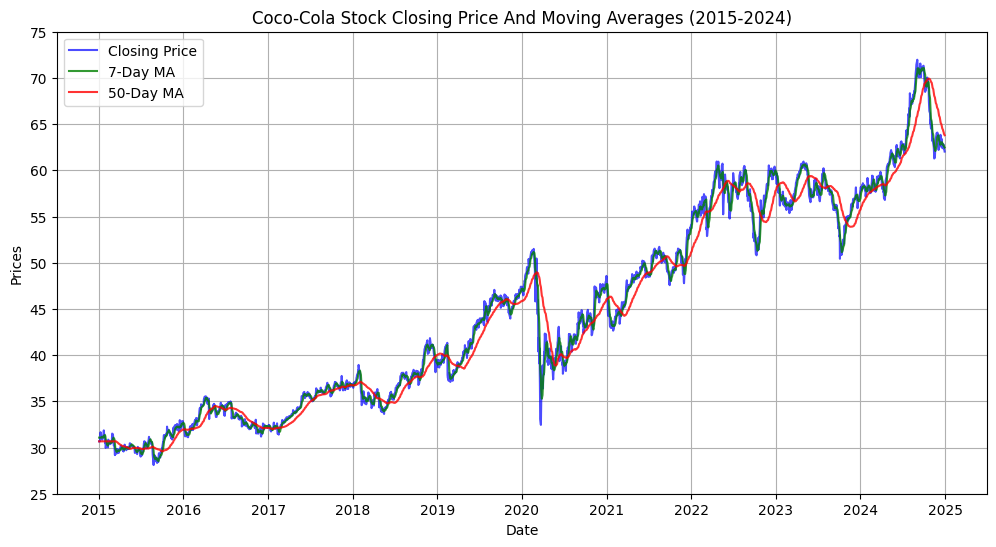

In [463]:
#plotted closing price and moving averages together
plt.figure(figsize=(12,6))
sns.lineplot(x=data['Date'],y=data['Close'],label='Closing Price',color='blue',alpha=0.7)
sns.lineplot(x=data['Date'],y=data['MA_7'],label='7-Day MA',color='green',alpha=0.8)
sns.lineplot(x=data['Date'],y=data['MA_50'],label='50-Day MA',color='red',alpha=0.8)
plt.xlabel('Date')
plt.ylabel('Prices')
plt.title('Coco-Cola Stock Closing Price And Moving Averages (2015-2024)')
plt.yticks(range(25,80,5))
plt.legend()
plt.grid()
plt.show()

In [464]:
#flagged days with high volatility
data['High_Volatility']=(data['Volatility']>data['Volatility'].quantile(0.9)).astype(int)
data.head()

,Date,Close,High,Low,Open,Volume,Year,Month,Volatility,Volume_log,Standardised_Volume,Prev_close,Prev_volatility,Daily_return_percent,MA_7,MA_50,High_Volatility
0,2015-01-02,30.662121,30.851305,30.414728,30.749435,9921100,2015,January,0.436577,16.110174,-0.682853,0.000000,0.000000,-0.283954,31.070625,30.668404,0
1,2015-01-05,30.662121,31.266051,30.618465,31.062314,26292600,2015,January,0.647586,17.084798,1.984242,30.662121,0.436577,-1.288356,31.070625,30.668404,0
2,2015-01-06,30.894945,31.244205,30.734870,30.858564,16897500,2015,January,0.509335,16.642676,0.453678,30.662121,0.647586,0.117895,31.070625,30.668404,0
3,2015-01-07,31.280603,31.367918,30.982277,31.142353,13412300,2015,January,0.385640,16.411683,-0.114099,30.894945,0.509335,0.443931,31.070625,30.668404,0
4,2015-01-08,31.658951,31.702609,31.360625,31.418836,21743600,2015,January,0.341985,16.894830,1.243160,31.280603,0.385640,0.764238,31.070625,30.668404,0


#### ML


In [465]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
model=RandomForestRegressor()
model

RandomForestRegressor()

In [466]:
#splitting and training
x=data[['Open','High','Low','Standardised_Volume','Prev_close','MA_7','MA_50']]
y=data[['Close']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model.fit(x_train,y_train)


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [467]:
predictions=model.predict(x_test)
predictions[0:4]

array([35.64051914, 37.16597179, 37.96537224, 41.25306171])

In [468]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
print('The Mean Squared Error is:',mean_squared_error(y_test,predictions))
print('The Mean Absolute Error is:',mean_absolute_error(y_test,predictions))
print('The R2 Score is',r2_score(y_test,predictions))

The Mean Squared Error is: 0.0651139454419926
The Mean Absolute Error is: 0.18112779188819703
The R2 Score is 0.9994670340076611


In [469]:
x_pred=model.predict(x_train)
print('R2 Score:',r2_score(y_train,x_pred))
print('MAE:',mean_absolute_error(y_train,x_pred))

R2 Score: 0.9999195609354802
MAE: 0.06698482557035106


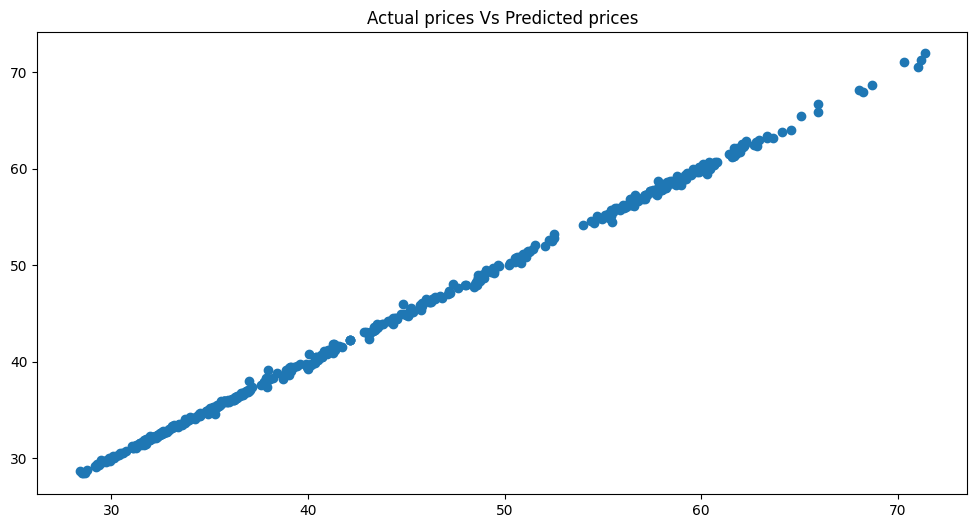

In [470]:
#plotted actual price vs predicted price
plt.figure(figsize=(12,6))
plt.scatter(predictions,y_test)
plt.title('Actual prices Vs Predicted prices')
plt.show()

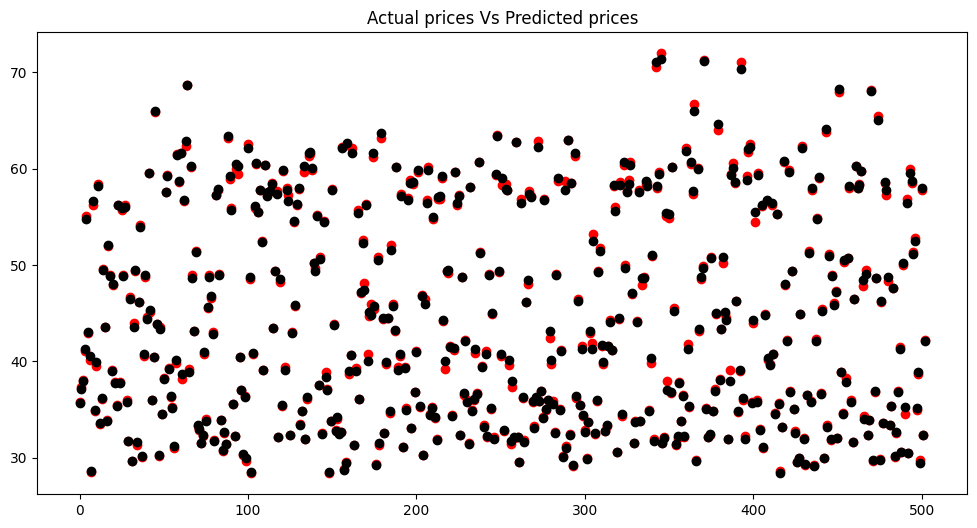

In [471]:
plt.figure(figsize=(12,6))
plt.scatter(range(len(y_test)),y_test,color='red',label='Actual Prices')
plt.scatter(range(len(predictions)),predictions,color='black',label='predicted prices')
plt.title('Actual prices Vs Predicted prices')
plt.show()

In [472]:
#converted the test data into numpy array and predictions into numpy array for residual plot
y_test=np.array(y_test)
predictions=np.array(predictions)

In [473]:
y_test=y_test.flatten()
predictions=predictions.flatten()
residuals=y_test-predictions

In [474]:
print(predictions.shape)
print(residuals.shape)   


(503,)
(503,)


##### The model have an R2 score of 0.9994,MEA 0.06,MAE 0.17 in test data and R2 score of 0.9999,MAE 0.066 in training data. So no overfitting is found.

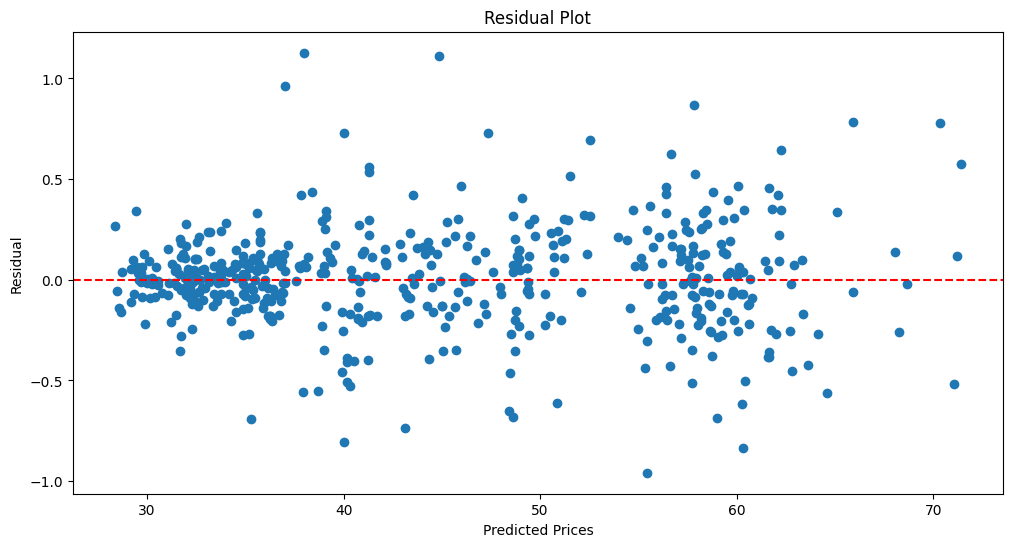

In [475]:
#residual analysis,difference between the predicted and actual prices
plt.figure(figsize=(12,6))
plt.scatter(predictions,residuals)
plt.axhline(y=0,color='red',linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()

#### Model using standardized data

In [476]:
data_ml=data.drop(columns=['Volume_log','Standardised_Volume'])
data_ml.head()

,Date,Close,High,Low,Open,Volume,Year,Month,Volatility,Prev_close,Prev_volatility,Daily_return_percent,MA_7,MA_50,High_Volatility
0,2015-01-02,30.662121,30.851305,30.414728,30.749435,9921100,2015,January,0.436577,0.000000,0.000000,-0.283954,31.070625,30.668404,0
1,2015-01-05,30.662121,31.266051,30.618465,31.062314,26292600,2015,January,0.647586,30.662121,0.436577,-1.288356,31.070625,30.668404,0
2,2015-01-06,30.894945,31.244205,30.734870,30.858564,16897500,2015,January,0.509335,30.662121,0.647586,0.117895,31.070625,30.668404,0
3,2015-01-07,31.280603,31.367918,30.982277,31.142353,13412300,2015,January,0.385640,30.894945,0.509335,0.443931,31.070625,30.668404,0
4,2015-01-08,31.658951,31.702609,31.360625,31.418836,21743600,2015,January,0.341985,31.280603,0.385640,0.764238,31.070625,30.668404,0


In [477]:
#another model using the standadized dataset
scaler=StandardScaler()
columns=['Close','High','Low','Open','Volume','Volatility','Prev_close','Prev_volatility','Daily_return_percent','MA_7','MA_50']
data_ml[columns]=scaler.fit_transform(data_ml[columns])
data_ml.head()

,Date,Close,High,Low,Open,Volume,Year,Month,Volatility,Prev_close,Prev_volatility,Daily_return_percent,MA_7,MA_50,High_Volatility
0,2015-01-02,-1.275700,-1.277160,-1.280170,-1.268142,-0.682853,2015,January,-0.438866,-4.040844,-1.528377,-0.305225,-1.237547,-1.263798,0
1,2015-01-05,-1.275700,-1.239831,-1.261559,-1.239785,1.984242,2015,January,0.088382,-1.269943,-0.438008,-1.386471,-1.237547,-1.263798,0
2,2015-01-06,-1.254602,-1.241797,-1.250926,-1.258251,0.453678,2015,January,-0.257065,-1.269943,0.088996,0.127367,-1.237547,-1.263798,0
3,2015-01-07,-1.219654,-1.230662,-1.228326,-1.232531,-0.114099,2015,January,-0.566141,-1.248903,-0.256291,0.478347,-1.237547,-1.263798,0
4,2015-01-08,-1.185368,-1.200538,-1.193764,-1.207473,1.243160,2015,January,-0.675223,-1.214051,-0.565224,0.823160,-1.237547,-1.263798,0


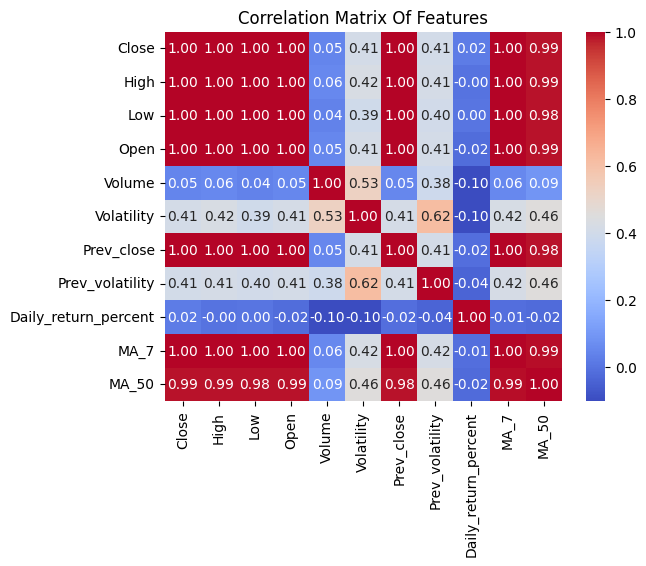

In [478]:
correlation_matrix=data[columns].corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix Of Features')
plt.show()

In [479]:
#training and fitting
X=data_ml[['High','Low','Open','Prev_close','MA_7','MA_50','Daily_return_percent','Volume']]
Y=data_ml[['Close']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [480]:
model1=RandomForestRegressor()
model1.fit(X_train,Y_train)
predictions1=model1.predict(X_test)
predictions1[0:3]

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


array([-0.82213354, -0.68365587, -0.6104554 ])

In [481]:
print('R2 Score:',r2_score(Y_test,predictions1))
print('MSE:',mean_squared_error(Y_test,predictions1))
print('MAE:',mean_absolute_error(Y_test,predictions1))

R2 Score: 0.9996874567387062
MSE: 0.0003135653649728859
MAE: 0.012158235622322815


In [482]:
X_pred=model1.predict(X_train)
print('R2 Score:',r2_score(Y_train,X_pred))
print('MAE:',mean_absolute_error(Y_train,X_pred))

R2 Score: 0.9999498879532529
MAE: 0.004471457369019141


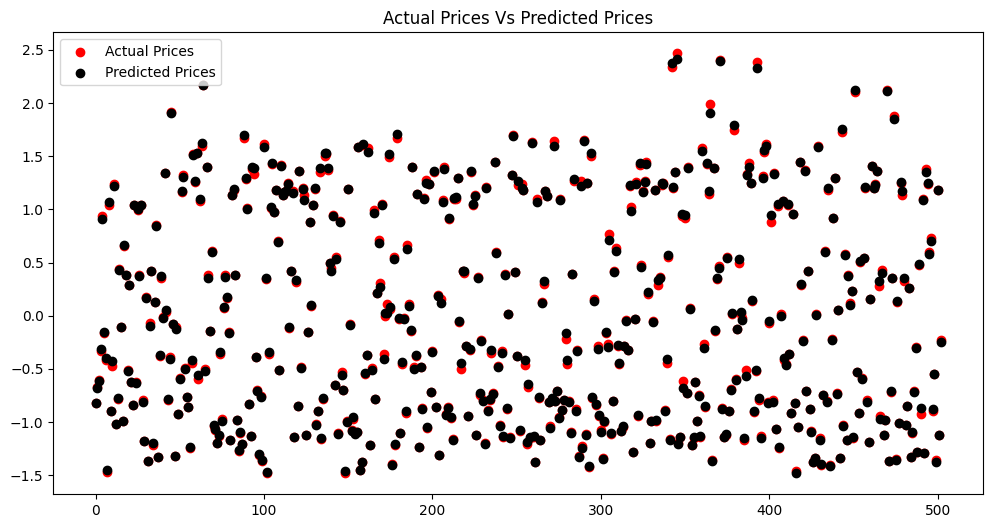

In [483]:
plt.figure(figsize=(12,6))
plt.scatter(range(len(Y_test)),Y_test,label='Actual Prices',color='red')
plt.scatter(range(len(predictions1)),predictions1,label='Predicted Prices',color='black')
plt.title('Actual Prices Vs Predicted Prices')
plt.legend(loc='upper left')

In [484]:
Y_test.shape

(503, 1)

In [485]:
predictions1.shape

(503,)

In [486]:
Y_test1=np.array(Y_test)
predictions11=np.array(predictions1)

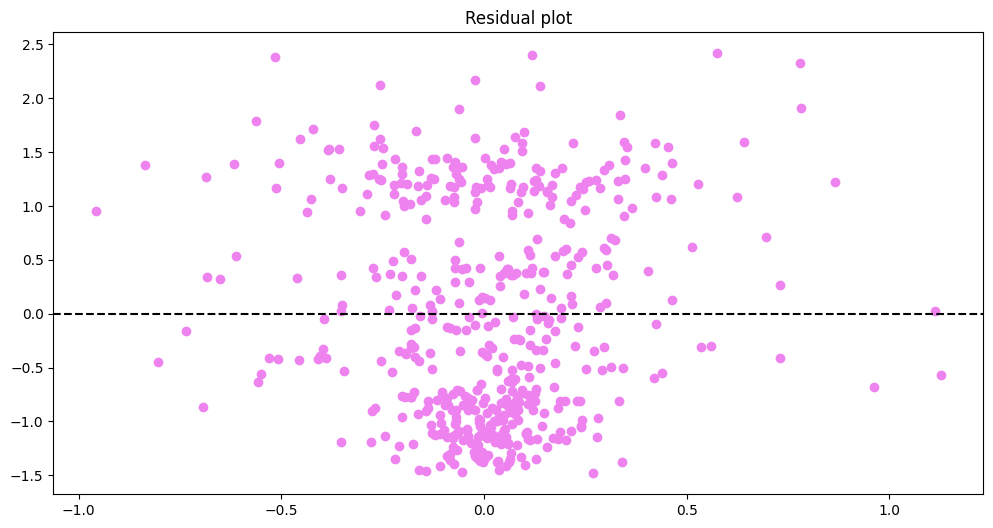

In [487]:
#residual plot,
residuals1=Y_test1-predictions11
plt.figure(figsize=(12,6))
plt.scatter(residuals,predictions11,color='violet')
plt.title('Residual plot')
plt.axhline(y=0,color='black',linestyle='--')
plt.show()

##### This model has an R2 score of 0.9996,MAE of 0.012,MSE of 0.0003 in test data and R2 score of 0.9999,MAE of 0.004 in training data. 

In [488]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
param_grids={'n_estimators':[50,75],
             'max_depth':[None,10],
             'min_samples_leaf':[1,4],
             'min_samples_split':[2,5],
             'max_features':['sqrt','log2']
             }

In [489]:
RFG=RandomForestRegressor()
gridsearch=GridSearchCV(estimator=RFG,param_grid=param_grids,cv=5,n_jobs=-1,verbose=2)
gridsearch.fit(X_train,Y_train)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 75]},
             verbose=2)

In [490]:
print('The best parameters:',gridsearch.best_params_)

The best parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 75}


In [491]:
best_model=gridsearch.best_estimator_
new_pred=best_model.predict(X_test)
print('The R2 Score is',r2_score(Y_test,new_pred))
print('MAE is',mean_absolute_error(Y_test,new_pred))
print('MSE is',mean_squared_error(Y_test,new_pred))

The R2 Score is 0.9996404613420246
MAE is 0.012982069784212192
MSE is 0.00036071444971560524


In [497]:
scores=cross_val_score(best_model,X_train,Y_train,cv=5,scoring='r2')
print('Cross Validation Scores:',scores)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionW

Cross Validation Scores: [0.99943824 0.99963453 0.99945896 0.99966708 0.99950703]


In [494]:
print('Mean R2 from cross validation:',scores.mean())

Mean R2 from cross validation: 0.9995426899933839
